In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [4]:
from wetterdienst import Wetterdienst
from wetterdienst import Resolution, Period
from wetterdienst import Settings
from wetterdienst.provider.dwd.observation import DwdObservationRequest, DwdObservationDataset, DwdObservationPeriod, DwdObservationResolution

In [5]:
Settings.tidy = False
Settings.default()
Settings.reset()

# Request for daily observation
    - start with climate summary for univariate analysis

In [6]:
def convert_to_celsius(df):
    """
    Convert the unit of temperature 
    from Kelvin to Celsius for all the columns.
    """
    col_names = df.filter(regex='temperature').columns
    df[col_names] = df[col_names].sub(273.15)

    return df
    

In [7]:
def get_time_into_columns(df):
    """
    Extract the year, month, day, name of the day, and the hour.
    """
    df['date'] =  pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")
    df = df.set_index('date')
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayname'] = df.index.day_name()
    df['hour'] = df.index.hour

    return df


In [8]:
def get_the_daily_data(end_date):
    """Get the daily data from DWD and do initial cleaning."""
    Settings.tidy = False
    Settings.default()
    request = DwdObservationRequest(
        parameter=[DwdObservationDataset.CLIMATE_SUMMARY],
        resolution=DwdObservationResolution.DAILY,
        start_date="1952-01-01",
        end_date=end_date,
        ).filter_by_station_id(station_id=[433])
    df = request.values.all().df
    df = convert_to_celsius(df)
    df = get_time_into_columns(df)

    return df

In [9]:
def get_the_hourly_data():
    """Get the daily data from DWD and do initial cleaning."""
    request = DwdObservationRequest(
        parameter=[DwdObservationDataset.TEMPERATURE_AIR],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-02-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])
    df = request.values.all().df
    df = convert_to_celsius(df)
    df = get_time_into_columns(df)

    return df

In [10]:
end_date = "2020-01-01"

In [11]:
df_daily = get_the_daily_data(end_date)

<AxesSubplot:xlabel='date', ylabel='temperature_air_mean_200'>

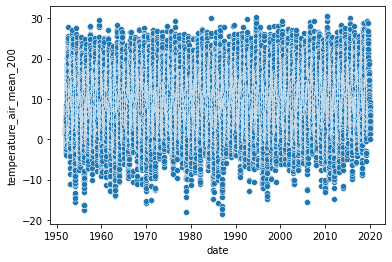

In [12]:
sns.scatterplot(x=df_daily.index, y = df_daily['temperature_air_mean_200'])

<AxesSubplot:xlabel='date', ylabel='temperature_air_mean_200'>

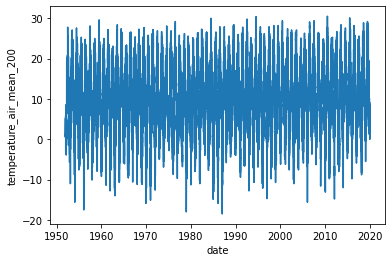

In [13]:
sns.lineplot(x=df_daily.index, y = df_daily['temperature_air_mean_200'])

In [14]:
df_daily

,station_id,dataset,qn_3,wind_gust_max,wind_speed,qn_4,precipitation_height,precipitation_form,sunshine_duration,snow_depth,...,temperature_air_mean_200,humidity,temperature_air_max_200,temperature_air_min_200,temperature_air_min_005,year,month,day,dayname,hour
date,,,,,,,,,,,,,,,,,,,,,
1952-01-01 00:00:00+00:00,00433,climate_summary,NaN,NaN,NaN,5.0,2.6,8.0,NaN,0.0,...,1.2,93.00,4.4,-0.1,-2.6,1952,1,1,Tuesday,0
1952-01-02 00:00:00+00:00,00433,climate_summary,NaN,NaN,NaN,5.0,5.6,8.0,NaN,0.0,...,4.9,78.00,6.5,0.7,-0.8,1952,1,2,Wednesday,0
1952-01-03 00:00:00+00:00,00433,climate_summary,NaN,NaN,NaN,5.0,1.7,8.0,NaN,0.0,...,2.7,87.00,7.5,1.6,2.6,1952,1,3,Thursday,0
1952-01-04 00:00:00+00:00,00433,climate_summary,NaN,NaN,NaN,5.0,1.2,8.0,NaN,0.0,...,2.4,87.00,3.5,-0.3,-2.5,1952,1,4,Friday,0
1952-01-05 00:00:00+00:00,00433,climate_summary,NaN,NaN,NaN,5.0,0.2,8.0,NaN,0.0,...,2.0,87.00,3.4,1.5,0.6,1952,1,5,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28 00:00:00+00:00,00433,climate_summary,10.0,6.5,3.2,3.0,0.0,0.0,0.0,NaN,...,1.3,74.79,2.4,-1.4,-6.3,2019,12,28,Saturday,0
2019-12-29 00:00:00+00:00,00433,climate_summary,10.0,6.2,1.9,3.0,0.0,0.0,15721.2,NaN,...,0.0,77.17,2.3,-3.6,-8.2,2019,12,29,Sunday,0
2019-12-30 00:00:00+00:00,00433,climate_summary,10.0,7.9,3.5,3.0,0.0,0.0,720.0,NaN,...,4.5,51.29,7.2,1.6,0.7,2019,12,30,Monday,0


<AxesSubplot:xlabel='year', ylabel='temperature_air_mean_200'>

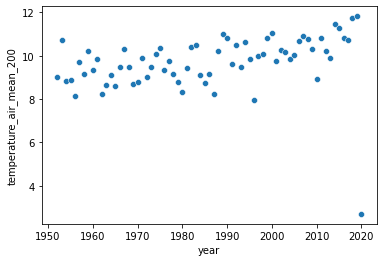

In [15]:
df_year = df_daily.groupby(['year']).mean()
sns.scatterplot(x=df_year.index, y = df_year['temperature_air_mean_200'])

<AxesSubplot:xlabel='temperature_air_mean_200', ylabel='humidity'>

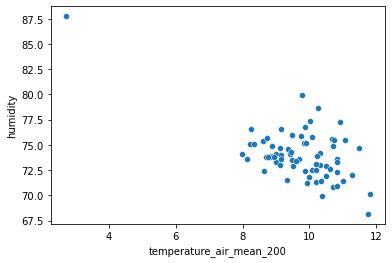

In [16]:
sns.scatterplot(x=df_year['temperature_air_mean_200'], y = df_year['humidity'])

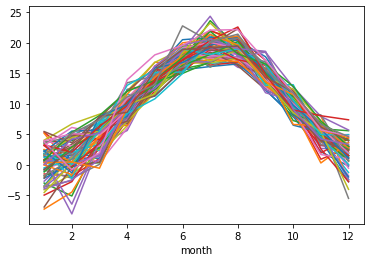

In [17]:
df_month_year = df_daily.groupby(['month', 'year']).mean()
ax_month = df_month_year["temperature_air_mean_200"].unstack().plot.line()
ax_month.get_legend().remove()

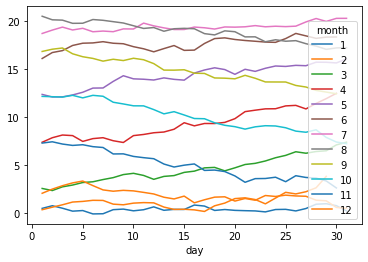

In [18]:
df_day_month = df_daily.groupby(['day', 'month']).mean()
ax_day = df_day_month["temperature_air_mean_200"].unstack().plot.line()


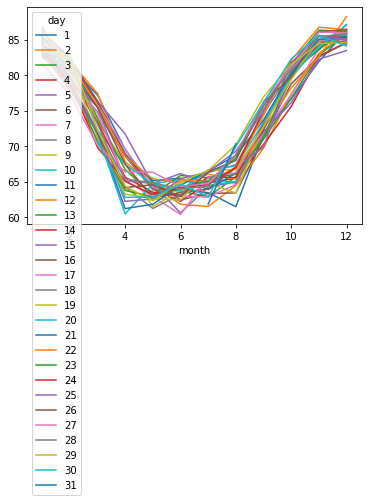

In [19]:
ax_day_humidity = df_day_month["humidity"].unstack(0).plot.line()

In [20]:
df_hourly = get_the_hourly_data()
df_hourly

,station_id,dataset,qn_9,temperature_air_mean_200,humidity,year,month,day,dayname,hour
date,,,,,,,,,,
1981-02-01 00:00:00+00:00,00433,temperature_air,3.0,1.0,92.0,1981,2,1,Sunday,0
1981-02-01 01:00:00+00:00,00433,temperature_air,3.0,1.5,92.0,1981,2,1,Sunday,1
1981-02-01 02:00:00+00:00,00433,temperature_air,3.0,1.2,92.0,1981,2,1,Sunday,2
1981-02-01 03:00:00+00:00,00433,temperature_air,3.0,0.9,89.0,1981,2,1,Sunday,3
1981-02-01 04:00:00+00:00,00433,temperature_air,3.0,0.2,86.0,1981,2,1,Sunday,4
...,...,...,...,...,...,...,...,...,...,...
2021-12-30 20:00:00+00:00,00433,temperature_air,3.0,12.6,93.0,2021,12,30,Thursday,20
2021-12-30 21:00:00+00:00,00433,temperature_air,3.0,12.7,93.0,2021,12,30,Thursday,21
2021-12-30 22:00:00+00:00,00433,temperature_air,3.0,12.7,93.0,2021,12,30,Thursday,22


<AxesSubplot:xlabel='date', ylabel='temperature_air_mean_200'>

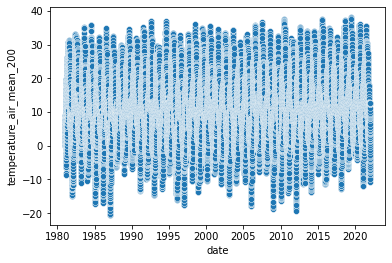

In [21]:
sns.scatterplot(x=df_hourly.index, y = df_hourly['temperature_air_mean_200'])

<AxesSubplot:xlabel='year', ylabel='temperature_air_mean_200'>

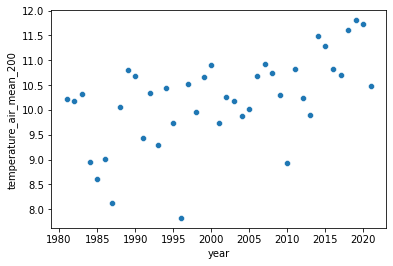

In [22]:
df_hourly = df_hourly.groupby(['year']).mean()
sns.scatterplot(x=df_hourly.index, y = df_hourly['temperature_air_mean_200'])

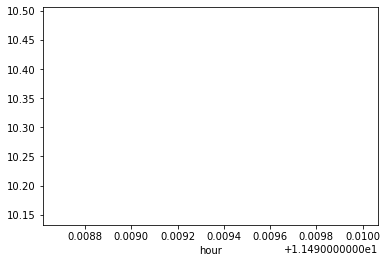

In [23]:
df_hour_day = df_hourly.groupby(['day', 'hour']).mean()
ax_hour = df_hour_day["temperature_air_mean_200"].unstack(0).plot.line()
ax_hour.get_legend().remove()

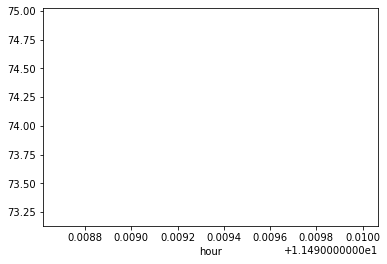

In [24]:
ax_hour_humidity = df_hour_day["humidity"].unstack(0).plot.line()
ax_hour_humidity.get_legend().remove()

In [25]:
request1 = DwdObservationRequest(
        parameter=[DwdObservationDataset.CLOUDINESS],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df = request1.values.all().df

In [26]:
df

,station_id,dataset,date,qn_8,cloud_cover_total_indicator,cloud_cover_total
0,00433,cloudiness,1981-01-01 00:00:00+00:00,1.0,P,100.0
1,00433,cloudiness,1981-01-01 01:00:00+00:00,1.0,P,100.0
2,00433,cloudiness,1981-01-01 02:00:00+00:00,1.0,P,100.0
3,00433,cloudiness,1981-01-01 03:00:00+00:00,1.0,P,87.5
4,00433,cloudiness,1981-01-01 04:00:00+00:00,1.0,P,100.0
...,...,...,...,...,...,...
359372,00433,cloudiness,2021-12-30 20:00:00+00:00,NaN,<NA>,NaN
359373,00433,cloudiness,2021-12-30 21:00:00+00:00,NaN,<NA>,NaN
359374,00433,cloudiness,2021-12-30 22:00:00+00:00,NaN,<NA>,NaN
359375,00433,cloudiness,2021-12-30 23:00:00+00:00,NaN,<NA>,NaN


In [27]:
request2 = DwdObservationRequest(
        parameter=[DwdObservationDataset.TEMPERATURE_AIR],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df2 = request2.values.all().df

In [28]:
df2

,station_id,dataset,date,qn_9,temperature_air_mean_200,humidity
0,00433,temperature_air,1981-01-01 00:00:00+00:00,NaN,NaN,NaN
1,00433,temperature_air,1981-01-01 01:00:00+00:00,3.0,276.65,91.0
2,00433,temperature_air,1981-01-01 02:00:00+00:00,3.0,277.15,85.0
3,00433,temperature_air,1981-01-01 03:00:00+00:00,3.0,277.05,86.0
4,00433,temperature_air,1981-01-01 04:00:00+00:00,3.0,276.25,90.0
...,...,...,...,...,...,...
359372,00433,temperature_air,2021-12-30 20:00:00+00:00,3.0,285.75,93.0
359373,00433,temperature_air,2021-12-30 21:00:00+00:00,3.0,285.85,93.0
359374,00433,temperature_air,2021-12-30 22:00:00+00:00,3.0,285.85,93.0
359375,00433,temperature_air,2021-12-30 23:00:00+00:00,3.0,285.95,92.0


In [29]:
request3 = DwdObservationRequest(
        parameter=[DwdObservationDataset.MOISTURE],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df3 = request3.values.all().df

In [30]:
df3

,station_id,dataset,date,qn_8,humidity_absolute,pressure_vapor,temperature_wet_mean_200,p_std,tt_std,rf_std,td_std
0,00433,moisture,1981-01-01 00:00:00+00:00,3.0,5.9,760.0,276.65,100750.0,277.15,93.2,276.15
1,00433,moisture,1981-01-01 01:00:00+00:00,3.0,5.9,760.0,276.65,100750.0,277.15,93.2,276.15
2,00433,moisture,1981-01-01 02:00:00+00:00,3.0,5.9,760.0,276.65,100750.0,277.15,93.2,276.15
3,00433,moisture,1981-01-01 03:00:00+00:00,3.0,5.1,660.0,275.85,100750.0,277.15,80.7,274.15
4,00433,moisture,1981-01-01 04:00:00+00:00,3.0,5.1,660.0,275.25,100750.0,276.15,86.6,274.15
...,...,...,...,...,...,...,...,...,...,...,...
359372,00433,moisture,2021-12-30 20:00:00+00:00,3.0,10.3,1360.0,285.15,100750.0,285.75,93.0,284.65
359373,00433,moisture,2021-12-30 21:00:00+00:00,3.0,10.3,1360.0,285.15,100790.0,285.85,92.4,284.65
359374,00433,moisture,2021-12-30 22:00:00+00:00,3.0,10.4,1370.0,285.25,100840.0,285.85,93.0,284.75
359375,00433,moisture,2021-12-30 23:00:00+00:00,3.0,10.3,1360.0,285.25,100840.0,285.95,91.8,284.65


In [31]:
request4 = DwdObservationRequest(
        parameter=[DwdObservationDataset.DEW_POINT],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df4 = request4.values.all().df

In [32]:
df4

,station_id,dataset,date,qn_8,tt,temperature_dew_point_mean_200
0,00433,dew_point,1981-01-01 00:00:00+00:00,1.0,277.15,276.15
1,00433,dew_point,1981-01-01 01:00:00+00:00,1.0,277.15,276.15
2,00433,dew_point,1981-01-01 02:00:00+00:00,1.0,277.15,276.15
3,00433,dew_point,1981-01-01 03:00:00+00:00,1.0,277.15,274.15
4,00433,dew_point,1981-01-01 04:00:00+00:00,1.0,276.15,274.15
...,...,...,...,...,...,...
359372,00433,dew_point,2021-12-30 20:00:00+00:00,3.0,285.75,284.65
359373,00433,dew_point,2021-12-30 21:00:00+00:00,3.0,285.85,284.65
359374,00433,dew_point,2021-12-30 22:00:00+00:00,3.0,285.85,284.75
359375,00433,dew_point,2021-12-30 23:00:00+00:00,3.0,285.95,284.65


In [33]:
request5 = DwdObservationRequest(
        parameter=[DwdObservationDataset.PRECIPITATION],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df5 = request5.values.all().df

In [34]:
df5 = df5.dropna()
df5

,station_id,dataset,date,qn_8,precipitation_height,precipitation_indicator,precipitation_form
177529,00433,precipitation,2001-04-03 01:00:00+00:00,1.0,0.0,0.0,0.0
177530,00433,precipitation,2001-04-03 02:00:00+00:00,1.0,0.0,0.0,0.0
177532,00433,precipitation,2001-04-03 04:00:00+00:00,1.0,0.0,0.0,0.0
177533,00433,precipitation,2001-04-03 05:00:00+00:00,1.0,0.0,0.0,0.0
177535,00433,precipitation,2001-04-03 07:00:00+00:00,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
244595,00433,precipitation,2008-11-26 11:00:00+00:00,3.0,0.0,0.0,0.0
244603,00433,precipitation,2008-11-26 19:00:00+00:00,3.0,0.0,0.0,0.0
244609,00433,precipitation,2008-11-27 01:00:00+00:00,3.0,0.0,0.0,0.0
244610,00433,precipitation,2008-11-27 02:00:00+00:00,3.0,0.0,0.0,0.0


In [35]:
request6 = DwdObservationRequest(
        parameter=[DwdObservationDataset.WIND],
        resolution=DwdObservationResolution.HOURLY,
        start_date="2021-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df6 = request6.values.all().df

In [36]:
df6

,station_id,dataset,date,qn_3,wind_speed,wind_direction
0,00433,wind,2021-01-01 00:00:00+00:00,10.0,1.8,150.0
1,00433,wind,2021-01-01 01:00:00+00:00,10.0,1.7,150.0
2,00433,wind,2021-01-01 02:00:00+00:00,10.0,2.0,150.0
3,00433,wind,2021-01-01 03:00:00+00:00,10.0,2.2,160.0
4,00433,wind,2021-01-01 04:00:00+00:00,10.0,1.4,160.0
...,...,...,...,...,...,...
8732,00433,wind,2021-12-30 20:00:00+00:00,3.0,5.4,260.0
8733,00433,wind,2021-12-30 21:00:00+00:00,3.0,5.1,260.0
8734,00433,wind,2021-12-30 22:00:00+00:00,3.0,5.3,260.0
8735,00433,wind,2021-12-30 23:00:00+00:00,3.0,5.2,260.0


In [37]:
request7 = DwdObservationRequest(
        parameter=[DwdObservationDataset.PRESSURE],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df7 = request7.values.all().df

In [38]:
df7 = df7.dropna()
df7

,station_id,dataset,date,qn_8,pressure_air_sea_level,pressure_air_site
59880,00433,pressure,1987-11-01 00:00:00+00:00,1.0,102020.0,101410.0
59881,00433,pressure,1987-11-01 01:00:00+00:00,1.0,101990.0,101380.0
59882,00433,pressure,1987-11-01 02:00:00+00:00,1.0,101920.0,101310.0
59883,00433,pressure,1987-11-01 03:00:00+00:00,1.0,101910.0,101300.0
59884,00433,pressure,1987-11-01 04:00:00+00:00,1.0,101890.0,101280.0
...,...,...,...,...,...,...
359372,00433,pressure,2021-12-30 20:00:00+00:00,3.0,101340.0,100750.0
359373,00433,pressure,2021-12-30 21:00:00+00:00,3.0,101380.0,100790.0
359374,00433,pressure,2021-12-30 22:00:00+00:00,3.0,101430.0,100840.0
359375,00433,pressure,2021-12-30 23:00:00+00:00,3.0,101430.0,100840.0


In [39]:
request8 = DwdObservationRequest(
        parameter=[DwdObservationDataset.SUN],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df8 = request8.values.all().df

In [40]:
df8

,station_id,dataset,date,qn_7,sunshine_duration
0,00433,sun,1981-01-01 00:00:00+00:00,NaN,NaN
1,00433,sun,1981-01-01 01:00:00+00:00,NaN,NaN
2,00433,sun,1981-01-01 02:00:00+00:00,NaN,NaN
3,00433,sun,1981-01-01 03:00:00+00:00,3.0,0.0
4,00433,sun,1981-01-01 04:00:00+00:00,3.0,0.0
...,...,...,...,...,...
359372,00433,sun,2021-12-30 20:00:00+00:00,3.0,0.0
359373,00433,sun,2021-12-30 21:00:00+00:00,NaN,NaN
359374,00433,sun,2021-12-30 22:00:00+00:00,NaN,NaN
359375,00433,sun,2021-12-30 23:00:00+00:00,NaN,NaN


In [41]:
request9 = DwdObservationRequest(
        parameter=[DwdObservationDataset.VISIBILITY],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df9 = request9.values.all().df

In [42]:
df9

,station_id,dataset,date,qn_8,visibility_range_indicator,visibility_range
0,00433,visibility,1981-01-01 00:00:00+00:00,1.0,P,6000.0
1,00433,visibility,1981-01-01 01:00:00+00:00,1.0,P,12000.0
2,00433,visibility,1981-01-01 02:00:00+00:00,1.0,P,18000.0
3,00433,visibility,1981-01-01 03:00:00+00:00,1.0,P,25000.0
4,00433,visibility,1981-01-01 04:00:00+00:00,1.0,P,25000.0
...,...,...,...,...,...,...
359372,00433,visibility,2021-12-30 20:00:00+00:00,NaN,<NA>,NaN
359373,00433,visibility,2021-12-30 21:00:00+00:00,NaN,<NA>,NaN
359374,00433,visibility,2021-12-30 22:00:00+00:00,NaN,<NA>,NaN
359375,00433,visibility,2021-12-30 23:00:00+00:00,NaN,<NA>,NaN


In [43]:
request10 = DwdObservationRequest(
        parameter=[DwdObservationDataset.TEMPERATURE_SOIL],
        resolution=DwdObservationResolution.HOURLY,
        start_date="1981-01-01",
        end_date="2021-12-31",
        ).filter_by_station_id(station_id=[433])

df10 = request10.values.all().df

In [44]:
df10

,station_id,dataset,date,qn_2,temperature_soil_mean_002,temperature_soil_mean_005,temperature_soil_mean_010,temperature_soil_mean_020,temperature_soil_mean_050,temperature_soil_mean_100
0,00433,temperature_soil,1981-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00433,temperature_soil,1981-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00433,temperature_soil,1981-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00433,temperature_soil,1981-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00433,temperature_soil,1981-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
359372,00433,temperature_soil,2021-12-30 20:00:00+00:00,3.0,NaN,279.65,277.45,275.25,275.65,278.15
359373,00433,temperature_soil,2021-12-30 21:00:00+00:00,3.0,NaN,280.05,277.95,275.75,275.65,278.15
359374,00433,temperature_soil,2021-12-30 22:00:00+00:00,3.0,NaN,280.35,278.35,276.15,275.75,278.15
359375,00433,temperature_soil,2021-12-30 23:00:00+00:00,3.0,NaN,280.65,278.65,276.45,275.75,278.15


In [45]:
df10 = df10.drop(['temperature_soil_mean_002'], axis=1)
df10

,station_id,dataset,date,qn_2,temperature_soil_mean_005,temperature_soil_mean_010,temperature_soil_mean_020,temperature_soil_mean_050,temperature_soil_mean_100
0,00433,temperature_soil,1981-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,00433,temperature_soil,1981-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,00433,temperature_soil,1981-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,00433,temperature_soil,1981-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,00433,temperature_soil,1981-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
359372,00433,temperature_soil,2021-12-30 20:00:00+00:00,3.0,279.65,277.45,275.25,275.65,278.15
359373,00433,temperature_soil,2021-12-30 21:00:00+00:00,3.0,280.05,277.95,275.75,275.65,278.15
359374,00433,temperature_soil,2021-12-30 22:00:00+00:00,3.0,280.35,278.35,276.15,275.75,278.15
359375,00433,temperature_soil,2021-12-30 23:00:00+00:00,3.0,280.65,278.65,276.45,275.75,278.15


In [46]:
df10 = df10.dropna()

In [47]:
df10

,station_id,dataset,date,qn_2,temperature_soil_mean_005,temperature_soil_mean_010,temperature_soil_mean_020,temperature_soil_mean_050,temperature_soil_mean_100
52598,00433,temperature_soil,1987-01-01 14:00:00+00:00,3.0,276.85,276.95,277.15,276.55,277.35
52622,00433,temperature_soil,1987-01-02 14:00:00+00:00,3.0,273.85,274.25,275.05,276.45,277.45
52646,00433,temperature_soil,1987-01-03 14:00:00+00:00,3.0,273.65,273.75,274.65,276.65,277.35
52670,00433,temperature_soil,1987-01-04 14:00:00+00:00,3.0,273.65,273.85,274.45,275.75,277.25
52694,00433,temperature_soil,1987-01-05 14:00:00+00:00,3.0,273.55,273.85,274.35,275.95,276.85
...,...,...,...,...,...,...,...,...,...
359372,00433,temperature_soil,2021-12-30 20:00:00+00:00,3.0,279.65,277.45,275.25,275.65,278.15
359373,00433,temperature_soil,2021-12-30 21:00:00+00:00,3.0,280.05,277.95,275.75,275.65,278.15
359374,00433,temperature_soil,2021-12-30 22:00:00+00:00,3.0,280.35,278.35,276.15,275.75,278.15
359375,00433,temperature_soil,2021-12-30 23:00:00+00:00,3.0,280.65,278.65,276.45,275.75,278.15


----

In [48]:
dir(DwdObservationDataset)

['CLIMATE_SUMMARY',
 'CLOUDINESS',
 'CLOUD_TYPE',
 'DEW_POINT',
 'MOISTURE',
 'PRECIPITATION',
 'PRECIPITATION_MORE',
 'PRESSURE',
 'SOIL',
 'SOLAR',
 'SUN',
 'TEMPERATURE_AIR',
 'TEMPERATURE_EXTREME',
 'TEMPERATURE_SOIL',
 'VISIBILITY',
 'WATER_EQUIVALENT',
 'WEATHER_PHENOMENA',
 'WEATHER_PHENOMENA_MORE',
 'WIND',
 'WIND_EXTREME',
 'WIND_SYNOPTIC',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [49]:
Settings.tidy = True
Settings.humanize = True
# Settings.default()
# Settings.reset()
request11 = DwdObservationRequest(
    parameter=[
        DwdObservationDataset.TEMPERATURE_AIR,
        DwdObservationDataset.TEMPERATURE_SOIL, 
        DwdObservationDataset.DEW_POINT, 
        DwdObservationDataset.VISIBILITY, 
        DwdObservationDataset.SUN,
        DwdObservationDataset.PRESSURE,
        DwdObservationDataset.WIND,
        DwdObservationDataset.MOISTURE,
        DwdObservationDataset.PRECIPITATION],
    resolution=DwdObservationResolution.HOURLY,
    start_date="2019-01-01",
    end_date="2022-01-01",
    ).filter_by_station_id(station_id=[433])
# df = request.values.all().df



In [50]:
df = request11.values.all().df

In [51]:
df_pivot = df.pivot_table(values='value', index='date', columns='parameter')

In [52]:
df_pivot.isna().sum()

parameter
humidity                           227
humidity_absolute                  117
p_std                              141
precipitation_height                40
precipitation_indicator             40
pressure_air_sea_level              32
pressure_air_site                   32
pressure_vapor                     117
rf_std                             117
sunshine_duration                 6766
td_std                             117
temperature_air_mean_200            24
temperature_dew_point_mean_200     227
temperature_soil_mean_005           52
temperature_soil_mean_010           24
temperature_soil_mean_020           24
temperature_soil_mean_050           24
temperature_soil_mean_100           24
temperature_wet_mean_200           141
tt                                  24
tt_std                             117
wind_direction                      95
wind_speed                         100
dtype: int64

In [53]:
df_pivot

parameter,humidity,humidity_absolute,p_std,precipitation_height,precipitation_indicator,pressure_air_sea_level,pressure_air_site,pressure_vapor,rf_std,sunshine_duration,...,temperature_soil_mean_005,temperature_soil_mean_010,temperature_soil_mean_020,temperature_soil_mean_050,temperature_soil_mean_100,temperature_wet_mean_200,tt,tt_std,wind_direction,wind_speed
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,86.0,7.3,101960.0,0.0,0.0,102570.0,101960.0,960.0,86.0,NaN,...,279.65,279.45,279.25,279.45,280.55,280.55,281.65,281.65,270.0,4.7
2019-01-01 01:00:00+00:00,83.0,7.1,101880.0,0.0,0.0,102480.0,101880.0,930.0,83.1,NaN,...,279.65,279.45,279.25,279.45,280.55,280.45,281.75,281.75,260.0,5.1
2019-01-01 02:00:00+00:00,83.0,7.0,101830.0,0.0,1.0,102430.0,101830.0,920.0,83.1,NaN,...,279.65,279.55,279.25,279.45,280.55,280.25,281.55,281.55,270.0,6.7
2019-01-01 03:00:00+00:00,88.0,7.3,101700.0,0.0,1.0,102300.0,101700.0,940.0,88.4,0.0,...,279.65,279.55,279.35,279.45,280.55,280.15,281.05,281.05,260.0,6.1
2019-01-01 04:00:00+00:00,86.0,7.0,101540.0,0.0,1.0,102140.0,101540.0,910.0,85.9,0.0,...,279.65,279.55,279.35,279.45,280.55,279.85,280.95,280.95,260.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00+00:00,93.0,9.9,100930.0,0.7,1.0,101520.0,100930.0,1300.0,93.0,0.0,...,282.15,281.05,279.55,277.45,278.15,284.45,285.05,285.05,270.0,6.2
2021-12-31 21:00:00+00:00,93.0,9.9,101010.0,0.0,1.0,101600.0,101010.0,1300.0,93.0,NaN,...,282.25,281.15,279.55,277.45,278.15,284.45,285.05,285.05,280.0,6.4
2021-12-31 22:00:00+00:00,93.0,9.9,101040.0,0.0,1.0,101630.0,101040.0,1300.0,93.0,NaN,...,282.25,281.15,279.65,277.55,278.15,284.45,285.05,285.05,270.0,5.6


In [54]:
df_pivot.columns

CategoricalIndex([                      'humidity',
                               'humidity_absolute',
                                           'p_std',
                            'precipitation_height',
                         'precipitation_indicator',
                          'pressure_air_sea_level',
                               'pressure_air_site',
                                  'pressure_vapor',
                                          'rf_std',
                               'sunshine_duration',
                                          'td_std',
                        'temperature_air_mean_200',
                  'temperature_dew_point_mean_200',
                       'temperature_soil_mean_005',
                       'temperature_soil_mean_010',
                       'temperature_soil_mean_020',
                       'temperature_soil_mean_050',
                       'temperature_soil_mean_100',
                        'temperature_wet_mean_200',
            

In [55]:
df_pivot.index =  pd.to_datetime(df_pivot.index, format="%Y-%m-%d %H:%M:%S")


In [56]:
df_resample = df_pivot.resample('D').max()

In [57]:
df_resample.isna().sum()

parameter
humidity                          8
humidity_absolute                 3
p_std                             4
precipitation_height              0
precipitation_indicator           0
pressure_air_sea_level            1
pressure_air_site                 1
pressure_vapor                    3
rf_std                            3
sunshine_duration                 9
td_std                            3
temperature_air_mean_200          1
temperature_dew_point_mean_200    8
temperature_soil_mean_005         1
temperature_soil_mean_010         1
temperature_soil_mean_020         1
temperature_soil_mean_050         1
temperature_soil_mean_100         1
temperature_wet_mean_200          4
tt                                1
tt_std                            3
wind_direction                    2
wind_speed                        2
dtype: int64

In [93]:
df_interp = df_resample.interpolate()

In [94]:
df_interp.isna().sum()

parameter
humidity                          0
humidity_absolute                 0
p_std                             0
precipitation_height              0
precipitation_indicator           0
pressure_air_sea_level            0
pressure_air_site                 0
pressure_vapor                    0
rf_std                            0
sunshine_duration                 0
td_std                            0
temperature_air_mean_200          0
temperature_dew_point_mean_200    0
temperature_soil_mean_005         0
temperature_soil_mean_010         0
temperature_soil_mean_020         0
temperature_soil_mean_050         0
temperature_soil_mean_100         0
temperature_wet_mean_200          0
tt                                0
tt_std                            0
wind_direction                    0
wind_speed                        0
dtype: int64

In [95]:
df_resample = convert_to_celsius(df_resample)

In [154]:
def get_the_daily_data(start_date, end_date):
    """
    Get the daily data from DWD and do initial cleaning.
    """
    Settings.tidy = False
    Settings.default()
    request = DwdObservationRequest(
        parameter=[DwdObservationDataset.CLIMATE_SUMMARY],
        resolution=DwdObservationResolution.DAILY,
        start_date=start_date,
        end_date=end_date,
        ).filter_by_station_id(station_id=[433])
    df = request.values.all().df
    df = convert_to_celsius(df)
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
    df.set_index('date', inplace= True)

    return df

In [155]:
start_date="2019-01-01"
end_date="2022-01-01"

In [156]:
df_daily = get_the_daily_data(start_date, end_date)

In [157]:
df_daily

,station_id,dataset,qn_3,wind_gust_max,wind_speed,qn_4,precipitation_height,precipitation_form,sunshine_duration,snow_depth,cloud_cover_total,pressure_vapor,pressure_air_site,temperature_air_mean_200,humidity,temperature_air_max_200,temperature_air_min_200,temperature_air_min_005
date,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,00433,climate_summary,10.0,18.8,8.0,9.0,1.2,4.0,2520.0,NaN,NaN,780.0,101090.0,6.6,79.00,8.7,3.2,1.9
2019-01-02 00:00:00+00:00,00433,climate_summary,10.0,17.7,7.5,9.0,0.2,4.0,6480.0,NaN,NaN,430.0,101760.0,1.8,61.00,3.7,-1.8,-5.0
2019-01-03 00:00:00+00:00,00433,climate_summary,10.0,10.3,4.7,9.0,0.1,4.0,0.0,NaN,NaN,460.0,102650.0,-0.3,77.00,2.0,-2.9,-7.4
2019-01-04 00:00:00+00:00,00433,climate_summary,10.0,10.2,4.6,9.0,1.9,4.0,0.0,NaN,NaN,650.0,102120.0,2.1,90.00,5.1,-0.5,-1.9
2019-01-05 00:00:00+00:00,00433,climate_summary,10.0,10.8,5.4,9.0,0.0,4.0,1440.0,NaN,NaN,830.0,101380.0,6.1,88.00,8.1,2.1,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28 00:00:00+00:00,00433,climate_summary,3.0,7.2,3.7,3.0,1.5,4.0,0.0,NaN,NaN,500.0,99430.0,-0.5,83.54,2.9,-4.3,-5.4
2021-12-29 00:00:00+00:00,00433,climate_summary,3.0,6.3,2.0,3.0,0.1,4.0,0.0,NaN,NaN,810.0,99827.0,4.5,95.46,5.9,2.4,0.2
2021-12-30 00:00:00+00:00,00433,climate_summary,3.0,10.9,3.7,3.0,2.8,4.0,0.0,NaN,NaN,1130.0,100559.0,9.3,94.92,12.9,4.6,3.7


In [158]:
df_resample['wind_gust_max'] = df_daily['wind_gust_max']

In [159]:
corr_df = df_resample.corr()

In [160]:
corr_df.columns

Index(['humidity', 'humidity_absolute', 'p_std', 'precipitation_height',
       'precipitation_indicator', 'pressure_air_sea_level',
       'pressure_air_site', 'pressure_vapor', 'rf_std', 'sunshine_duration',
       'td_std', 'temperature_air_mean_200', 'temperature_dew_point_mean_200',
       'temperature_soil_mean_005', 'temperature_soil_mean_010',
       'temperature_soil_mean_020', 'temperature_soil_mean_050',
       'temperature_soil_mean_100', 'temperature_wet_mean_200', 'tt', 'tt_std',
       'wind_direction', 'wind_speed', 'wind_gust_max'],
      dtype='object', name='parameter')

In [161]:
corr_df_sort = corr_df.sort_values(by = 'temperature_air_mean_200', ascending=False)

In [162]:
corr_df_sort[['temperature_air_mean_200']]

parameter,temperature_air_mean_200
parameter,
temperature_air_mean_200,1.000000
tt,1.000000
tt_std,0.999955
temperature_wet_mean_200,0.958353
temperature_soil_mean_005,0.956944
temperature_soil_mean_010,0.954332
temperature_soil_mean_020,0.935188
temperature_soil_mean_050,0.877866
temperature_dew_point_mean_200,0.851801


<AxesSubplot:xlabel='parameter', ylabel='parameter'>

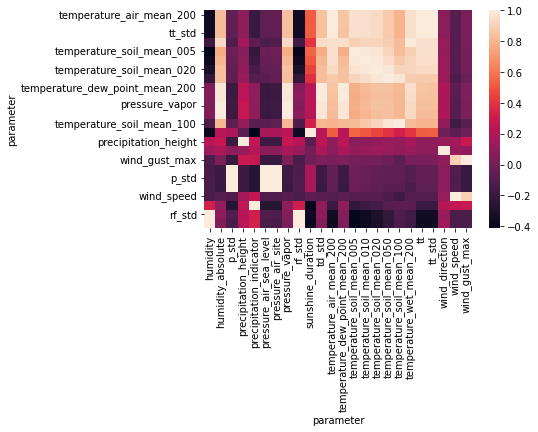

In [163]:
sns.heatmap(corr_df_sort)

In [164]:
mask = np.triu(np.ones_like(corr_df, dtype=bool))

<AxesSubplot:xlabel='parameter', ylabel='parameter'>

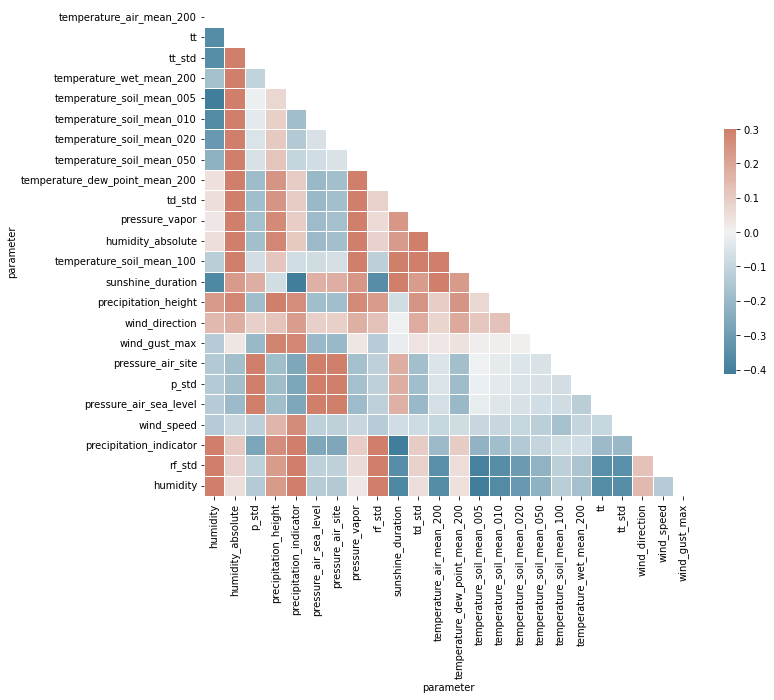

In [165]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_df_sort, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [166]:
df_shift = df_resample.copy()

In [167]:
df_shift[['temperature_air_mean_200']]

parameter,temperature_air_mean_200
date,
2019-01-01 00:00:00+00:00,-264.55
2019-01-02 00:00:00+00:00,-269.75
2019-01-03 00:00:00+00:00,-271.25
2019-01-04 00:00:00+00:00,-268.25
2019-01-05 00:00:00+00:00,-265.15
...,...
2021-12-28 00:00:00+00:00,-270.35
2021-12-29 00:00:00+00:00,-267.25
2021-12-30 00:00:00+00:00,-260.35


In [170]:
dzzz = df_shift[['temperature_air_mean_200']]

In [173]:
dzzz['lag'] = dzzz['temperature_air_mean_200'].shift(1)

/var/folders/ds/lq7q9q110g96823p7410m9qh0000gn/T/ipykernel_23362/2637139433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dzzz['lag'] = dzzz['temperature_air_mean_200'].shift(1)


In [174]:
dzzz

parameter,temperature_air_mean_200,lag
date,,
2019-01-01 00:00:00+00:00,-264.55,NaN
2019-01-02 00:00:00+00:00,-269.75,-264.55
2019-01-03 00:00:00+00:00,-271.25,-269.75
2019-01-04 00:00:00+00:00,-268.25,-271.25
2019-01-05 00:00:00+00:00,-265.15,-268.25
...,...,...
2021-12-28 00:00:00+00:00,-270.35,-274.05
2021-12-29 00:00:00+00:00,-267.25,-270.35
2021-12-30 00:00:00+00:00,-260.35,-267.25


In [176]:
features = ['temperature_air_mean_200', 'temperature_dew_point_mean_200','humidity', 'humidity_absolute', 'pressure_vapor', 'pressure_air_site', 'wind_speed', 'wind_direction', 'wind_gust_max', 'sunshine_duration']

/var/folders/ds/lq7q9q110g96823p7410m9qh0000gn/T/ipykernel_23362/403940267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shift_temp[f'{feature}_lag{i}'] = df_shift[f'{feature}'].shift(i)
/var/folders/ds/lq7q9q110g96823p7410m9qh0000gn/T/ipykernel_23362/403940267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shift_temp[f'{feature}_lag{i}'] = df_shift[f'{feature}'].shift(i)
/var/folders/ds/lq7q9q110g96823p7410m9qh0000gn/T/ipykernel_23362/403940267.py:4: SettingWithCopyWarning: 
A value is try

<Figure size 432x288 with 0 Axes>

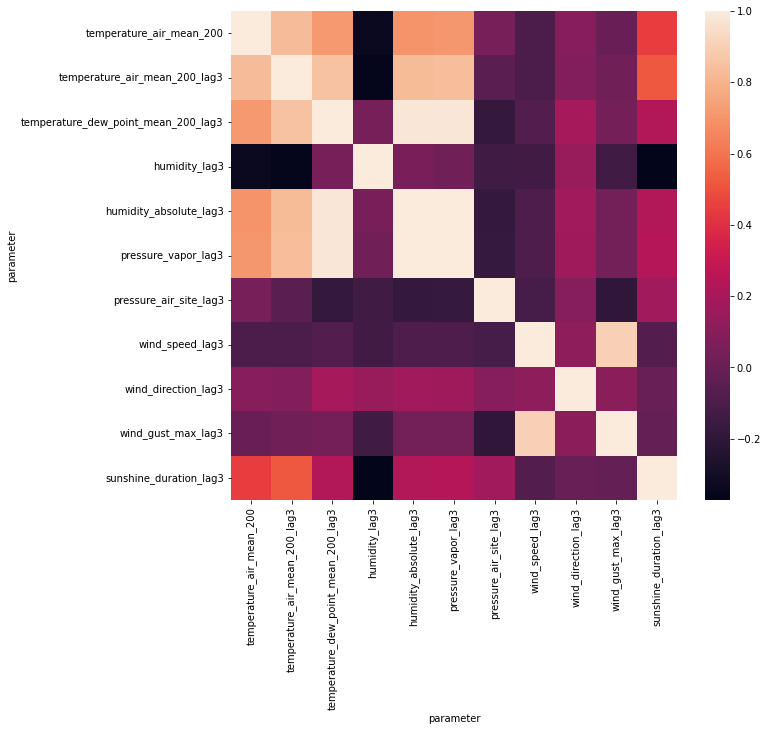

In [181]:
for i in [3]:
    df_shift_temp = df_shift[['temperature_air_mean_200']]
    for feature in features:
        df_shift_temp[f'{feature}_lag{i}'] = df_shift[f'{feature}'].shift(i)
    df_shift_temp = df_shift_temp.iloc[i:]
    df_shift_temp_corr = df_shift_temp.corr()
    plt.clf()
    plt.figure(figsize=(10,9))
    svm = sns.heatmap(df_shift_temp_corr)
    figure = svm.get_figure()  
    figure.savefig(f'lag_{i}_heatmap.jpg')
    figure.savefig(f'lag_{i}_heatmap.png')

  

In [180]:
plt.show()

In [135]:
df_test = pd.DataFrame(df_shift['temperature_air_mean_200'])

In [136]:
for feature in features:
    df_shift_temp[f'{feature}_lag{5}'] = df_shift[f'{feature}'].shift(-5)

In [137]:
df_shift_temp

,temperature_air_mean_200,humidity_lag30,humidity_absolute_lag30,pressure_vapor_lag30,pressure_air_site_lag30,rf_std_lag30,wind_speed_lag30,wind_direction_lag30,humidity_lag5,humidity_absolute_lag5,pressure_vapor_lag5,pressure_air_site_lag5,rf_std_lag5,wind_speed_lag5,wind_direction_lag5
date,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,-264.55,84.0,4.3,540.0,99540.0,84.3,3.7,160.0,90.0,5.1,650.0,102340.0,90.4,5.1,350.0
2019-01-02 00:00:00+00:00,-269.75,89.0,4.2,530.0,99390.0,89.3,4.6,130.0,97.0,6.6,850.0,102310.0,97.2,5.4,280.0
2019-01-03 00:00:00+00:00,-271.25,95.0,5.0,630.0,99910.0,95.0,4.9,300.0,94.0,6.6,850.0,100650.0,93.9,9.0,310.0
2019-01-04 00:00:00+00:00,-268.25,97.0,5.2,660.0,101620.0,97.2,6.3,340.0,92.0,5.5,700.0,101040.0,92.4,8.9,360.0
2019-01-05 00:00:00+00:00,-265.15,93.0,4.7,600.0,102230.0,92.9,4.5,310.0,92.0,5.2,660.0,101810.0,92.4,6.5,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28 00:00:00+00:00,-268.45,95.0,5.4,690.0,99960.0,94.4,4.6,130.0,89.0,4.6,580.0,100260.0,89.0,5.9,260.0
2021-11-29 00:00:00+00:00,-270.05,98.0,6.9,890.0,100270.0,97.9,3.7,270.0,93.0,5.0,640.0,99710.0,92.3,4.5,210.0
2021-11-30 00:00:00+00:00,-267.05,98.0,10.4,1380.0,100840.0,97.9,5.9,260.0,97.0,5.0,630.0,100520.0,96.4,3.7,120.0


In [ ]:
for feature in features:
        df_shift_temp[f'{feature}_lag{5}'] = df_shift[f'{feature}'].shift(-5)

In [104]:
df_shift_temp = pd.DataFrame(df_shift['temperature_air_mean_200'])

In [105]:
features = ['humidity', 'humidity_absolute', 'pressure_vapor', 'pressure_air_site', 'rf_std', 'wind_speed', 'wind_direction']

In [106]:
for feature in features:
    df_shift_temp[f'{feature}_lag1'] = df_shift[f'{feature}']
df_shift_temp = df_shift_temp.iloc[:-1]

In [107]:
df_shift_temp_corr = df_shift_temp.corr()

In [112]:
df_shift_temp_corr = df_shift_temp_corr.sort_values(by='temperature_air_mean_200')

In [113]:
mask_one = np.triu(np.ones_like(df_shift_temp_corr, dtype=bool))

<Figure size 720x648 with 0 Axes>

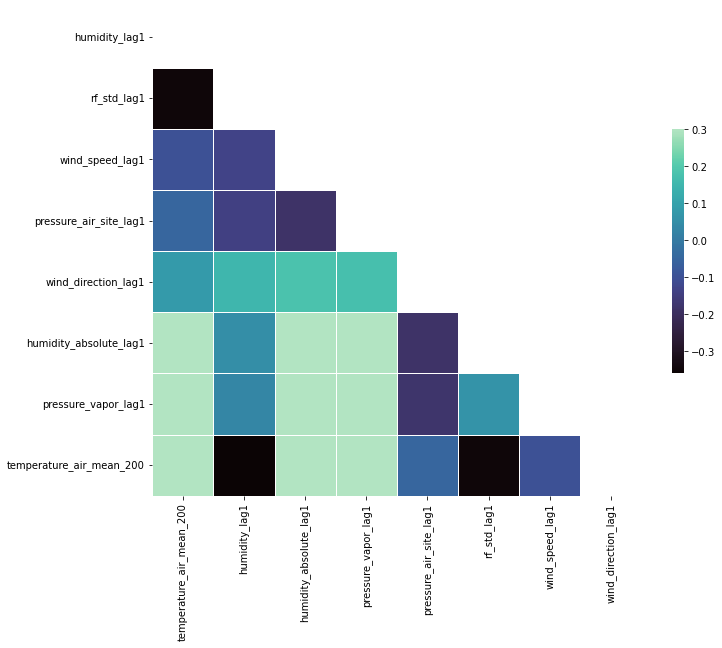

In [128]:
plt.figure(figsize=(10,9))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette("mako", as_cmap=True)
svm = sns.heatmap(df_shift_temp_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [129]:
figure = svm.get_figure()  
figure.savefig('lag1_heatmap.jpg')

In [131]:
figure.savefig('lag1_heatmap.jpg')

In [ ]:
sns.heatmap